### 1. 타이타닉 생존여부 확인

- #### 로지스틱회귀모델을 이용해 타이타닉호 승선객의 생존여부 예측
- #### Age 결측치(NaN) 값은 다음과 같이 처리
    - 생존자(Survived = 1)는 생존자 나이의 평균으로 대체
    - 사망자(Survived = 0)는 사망자 나이의 평균으로 대체
- #### Embarked 결측치(NaN) 값은 가장 많은 값으로 대체

In [76]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [77]:
titanic=pd.read_csv("titanic.csv")
titanic_df=titanic.copy()
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
titanic_df.loc[titanic_df['Survived']==0,'Age']=titanic_df[titanic['Survived']==0]['Age'].fillna(titanic_df[titanic_df['Survived']==0]['Age'].mean())

In [80]:
titanic_df.loc[titanic_df['Survived']==1,'Age']=titanic_df[titanic['Survived']==1]['Age'].fillna(titanic_df[titanic_df['Survived']==1]['Age'].mean())

In [81]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.626179,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [83]:
most_freq =titanic_df['Embarked'].value_counts(dropna=True).idxmax()
titanic_df['Embarked'].fillna(most_freq, inplace = True)

In [105]:
titanic_df['Embarked'].isna().sum()

0

### 2. 타이타닉 생존여부 확인
- #### 회귀계수 축소모형을 이용해 타이타닉호 승선객의 생존여부 예측

In [108]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,30.626179,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [115]:
from sklearn.preprocessing import LabelEncoder
features = ['Sex','Embarked']
for feature in features:
    le = LabelEncoder()
    le = le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])

In [116]:
feature_columns=list(titanic_df.columns.difference(["Survived"]))
x=titanic_df[feature_columns]
y=titanic_df["Survived"]

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,
                                              random_state=102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [122]:
def PRED(y,threshold):
    Y=y.copy()
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [125]:
def acc(cfmat):
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return acc

## Lasso로 회귀분석

In [118]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [119]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
lasso.coef_

array([-6.45021177e-03, -4.03634963e-02,  6.85061836e-04, -0.00000000e+00,
        3.52327017e-05, -1.55155082e-01, -4.17244715e-01, -4.34348253e-02])

In [123]:
pred_y_lasso=lasso.predict(x_test)
pred_Y_lasso=PRED(pred_y_lasso,0.5)

In [126]:
cfmat=confusion_matrix(y_test,pred_Y_lasso)
print(acc(cfmat))

0.8022388059701493


AUC:  0.8616825754431731


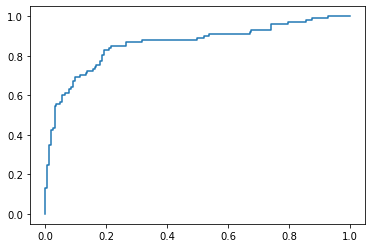

In [127]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred_y_lasso)
plt.plot(fpr,tpr)

auc=np.trapz(tpr,fpr)
print("AUC: ",auc)

### <더 나아가기>
#### 과제까지 모두 하신 분들 중 더 연습 하고 싶다면... 
1. (titanic) 데이터 전처리 강화 후 모델 적합/성능비교
2. (titanic) 회귀계수 축소모형의 alpha , l1_ratio, PRED의 threshold 변경하면서 모델 성능 비교
3. (boston) 회귀계수 축소모형 적용하여 모델 성능 비교